## Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Column Label Dictionary

- date:	Unixtime date when events occured.
- companyId
- jobId
- country: Country of job-posting.
- stateProvince:	Name of the state or province of the job posting.
- city: Name of job posting city.
- avgOverallRating:	Average rating of the company (1-5 stars), with 0s for non-rated companies.
- numReviews: Total number of reviews the company had.
- industry: Industry associated with the company.
- normTitle: The normalized / canonical job title.
- normTitleCategory: The category (similar to occupational category) of the norm title.
- descriptionCharacterLength: Number of characters in job description.
- descriptionWordCount: Number of words in job description.
- experienceRequired: Minimum experience required for the job in years.
- estimatedSalary: Estimated annual salary (0 when estimate not available).
- salaryCurrency: Salary currency.
- jobLanguage: Job language.
- supervisingJob: Whether this job is classified as a supervising job.
-  licenseRequiredJob: Whether this job is classified as requiring a license.
- educationRequirements: The job's education requirement. Values ("None", "High School", "Higher Education").
- jobAgeDays: Age of job in days, based on job create date and on central timezone. Resets if job is 'refreshed'.
- clicks: The total number of clicks on the job on the date.
- localClicks: The total number of clicks on the job from a local user (same city and country) on the date.

In [2]:
# import findspark
# findspark.init()

In [3]:
# import pyspark as ps
# import warnings
# from pyspark.sql import *

In [4]:
# sc = ps.sql.SparkSession.builder.master('local[4]').getOrCreate()

In [5]:
# df = sc.read.csv('E:\josh_data_science\Vassar Datafest 2018\Data_Feature_Dictionary\indeed.csv')

In [6]:
# def _map_to_pandas(rdds):
#     return [pd.DataFrame(list(rdds))]

# def to_pandas(df, n_partitions=None):
#     if n_partitions is not None: df = df.repartition(n_partitions)
#     df_pand = df.rdd.mapPartitions(_map_to_pandas).collect()
#     df_pand = pd.concat(df_pand)
#     df_pand.columns = df.columns
#     return df_pand

In [7]:
# pdf = to_pandas(df)

## Observing Data (Having a taste of Data)

In [8]:
df = pd.read_csv('E:\josh_data_science\Vassar Datafest 2018\Dataset_and_FeatureDictionary\indeed.csv')

In [9]:
print("Number of rows and columns: ", df.shape)

Number of rows and columns:  (14586035, 23)


In [10]:
df.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks
0,2016-11-01,company00000,job0000000,CA,ON,Cambridge,0.0,NaN,NaN,driver,...,NaN,40600,NaN,EN,0.0,0.0,None,99,4,1
1,2016-11-01,company00002,job0000002,US,AZ,Peoria,0.0,NaN,NaN,customer service representative,...,NaN,22800,NaN,EN,0.0,0.0,High School,99,12,2
2,2016-11-01,company00003,job0000003,US,GA,Cartersville,3.7,71.0,NaN,host/hostess,...,NaN,22500,NaN,EN,0.0,0.0,None,99,15,3
3,2016-11-01,company00005,job0000005,US,AR,Malvern,5.0,46.0,NaN,data entry clerk,...,NaN,26100,NaN,EN,0.0,0.0,High School,99,25,8
4,2016-11-01,company00005,job0000006,US,AR,Augusta,5.0,46.0,NaN,data entry clerk,...,NaN,26200,NaN,EN,0.0,0.0,High School,99,33,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14586035 entries, 0 to 14586034
Data columns (total 23 columns):
date                          object
companyId                     object
jobId                         object
country                       object
stateProvince                 object
city                          object
avgOverallRating              float64
numReviews                    float64
industry                      object
normTitle                     object
normTitleCategory             object
descriptionCharacterLength    int64
descriptionWordCount          int64
experienceRequired            float64
estimatedSalary               int64
salaryCurrency                object
jobLanguage                   object
supervisingJob                float64
licenseRequiredJob            float64
educationRequirements         object
jobAgeDays                    int64
clicks                        int64
localClicks                   int64
dtypes: float64(5), int64(6), objec

## Observing each column & Cleaning & Handling Missing Data

#### Date

In [12]:
# Timespan of data
print("From ",df.date.min(), " to ", df.date.max())

From  2016-11-01  to  2017-11-30


In [13]:
# No missing value
len(df[df.date.isnull()])

0

In [14]:
df.date.value_counts().index.tolist()
# No weird labels

['2017-08-24',
 '2017-08-25',
 '2017-08-23',
 '2017-08-22',
 '2017-08-29',
 '2017-08-21',
 '2017-08-28',
 '2017-08-30',
 '2017-08-26',
 '2017-08-18',
 '2017-08-27',
 '2017-08-31',
 '2017-08-17',
 '2017-08-19',
 '2017-08-20',
 '2017-08-16',
 '2017-08-15',
 '2017-09-01',
 '2017-08-04',
 '2017-08-01',
 '2017-08-03',
 '2017-08-14',
 '2017-08-02',
 '2017-10-06',
 '2017-10-05',
 '2017-08-11',
 '2017-10-19',
 '2017-10-04',
 '2017-10-18',
 '2017-07-31',
 '2017-10-03',
 '2017-09-28',
 '2017-10-20',
 '2017-08-10',
 '2017-10-17',
 '2017-08-07',
 '2017-07-28',
 '2017-09-27',
 '2017-08-08',
 '2017-09-29',
 '2017-08-05',
 '2017-08-12',
 '2017-10-02',
 '2017-10-13',
 '2017-08-09',
 '2017-10-12',
 '2017-10-16',
 '2017-09-26',
 '2017-07-27',
 '2017-10-11',
 '2017-11-03',
 '2017-10-07',
 '2017-08-13',
 '2017-07-29',
 '2017-08-06',
 '2017-07-26',
 '2017-10-10',
 '2017-07-19',
 '2017-11-06',
 '2017-09-15',
 '2017-09-30',
 '2017-09-21',
 '2017-10-25',
 '2017-07-20',
 '2017-10-21',
 '2017-09-14',
 '2017-11-

#### Company ID & Job ID

In [15]:
print("Largest and smallest number of job postings of companies: ", df.companyId.value_counts().max(), "and", df.companyId.value_counts().min())
print("Company with largest number of job postings: ", 
      df.companyId.value_counts()[df.companyId.value_counts()==df.companyId.value_counts().max()].index[0])
print("Company with smallest number of job postings: ", 
      df.companyId.value_counts()[df.companyId.value_counts()==df.companyId.value_counts().min()].index[0], "etc.")
# There are multiple companies with only one job posting in total (That's why it's etc.)

Largest and smallest number of job postings of companies:  222955 and 1
Company with largest number of job postings:  company02436
Company with smallest number of job postings:  company23946 etc.


In [16]:
print("Largest and smallest number of postings of jobs: ", df.jobId.value_counts().max(), "and", df.jobId.value_counts().min())
print("Job with largest number of postings: ", 
      df.jobId.value_counts()[df.jobId.value_counts()==df.jobId.value_counts().max()].index[0])
print("Job with smallest number of postings: ", 
      df.jobId.value_counts()[df.jobId.value_counts()==df.jobId.value_counts().min()].index[0], "etc.")

Largest and smallest number of postings of jobs:  102 and 1
Job with largest number of postings:  job0210510
Job with smallest number of postings:  job0598462 etc.


In [17]:
# No missing value
len(df[df.companyId.isnull()])

0

In [18]:
# No missing value
len(df[df.jobId.isnull()])

0

#### Country

In [19]:
# United States, Germany, Canada
df.country.value_counts()

US    11547904
DE     1925795
CA     1112336
Name: country, dtype: int64

In [20]:
# No missing value
len(df[df.country.isnull()])

0

#### stateProvince and city

In [21]:
# No missing value
len(df[df.stateProvince.isnull()])

0

In [22]:
df.stateProvince.value_counts().index.tolist()

['CA',
 'TX',
 'FL',
 'NY',
 'ON',
 'IL',
 'PA',
 'OH',
 'VA',
 'NC',
 'NW',
 'GA',
 'MA',
 'BY',
 'MI',
 'NJ',
 'BW',
 'WA',
 'MD',
 'CO',
 'IN',
 'MN',
 'AZ',
 'WI',
 'MO',
 'TN',
 'QC',
 'BC',
 'SC',
 'HE',
 'BE',
 'CT',
 'OR',
 'KY',
 'AL',
 'NI',
 'UNKNOWN',
 'AB',
 'OK',
 'LA',
 'IA',
 'UT',
 'KS',
 'NV',
 'SN',
 'HH',
 'DC',
 'AR',
 'NE',
 'NH',
 'RP',
 'MS',
 'NM',
 'WV',
 'SH',
 'ME',
 'ID',
 'RI',
 'HI',
 'TH',
 'DE',
 'ST',
 'BB',
 'ND',
 'MT',
 'SD',
 'MV',
 'SK',
 'VT',
 'MB',
 'HB',
 'AK',
 'NS',
 'WY',
 'NB',
 'SL',
 'NL',
 'PR',
 'PE',
 'YT',
 'NT',
 'VI',
 'GU',
 'NU',
 'MP',
 'AS',
 'UM']

While there is no explicit "null" values, we can see there are "UNKNOWN" values which are equivalent to null

In [23]:
# Number of rows that have missing information about states in each country
df[df.stateProvince=="UNKNOWN"].country.value_counts()

US    70919
DE    38795
CA     8719
Name: country, dtype: int64

In [24]:
df[df.stateProvince=="UNKNOWN"]

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirements,jobAgeDays,clicks,localClicks
156,2016-11-01,company00195,job0000209,US,UNKNOWN,NaN,0.0,NaN,NaN,software test engineer,...,4.0,99400,NaN,EN,0.0,0.0,Higher Education,98,47,0
157,2016-11-02,company00195,job0000209,US,UNKNOWN,NaN,0.0,NaN,NaN,software test engineer,...,4.0,99400,NaN,EN,0.0,0.0,Higher Education,99,27,4
158,2016-11-03,company00195,job0000209,US,UNKNOWN,NaN,0.0,NaN,NaN,software test engineer,...,4.0,99400,NaN,EN,0.0,0.0,Higher Education,100,16,0
687,2016-11-01,company00622,job0000686,US,UNKNOWN,NaN,4.2,55.0,NaN,member services representative,...,3.0,30800,NaN,EN,0.0,0.0,High School,95,24,3
688,2016-11-02,company00622,job0000686,US,UNKNOWN,NaN,4.2,55.0,NaN,member services representative,...,3.0,30800,NaN,EN,0.0,0.0,High School,96,12,0
689,2016-11-03,company00622,job0000686,US,UNKNOWN,NaN,4.2,55.0,NaN,member services representative,...,3.0,30800,NaN,EN,0.0,0.0,High School,97,23,0
690,2016-11-04,company00622,job0000686,US,UNKNOWN,NaN,4.2,55.0,NaN,member services representative,...,3.0,30800,NaN,EN,0.0,0.0,High School,98,28,0
896,2016-11-01,company00736,job0000804,US,UNKNOWN,NaN,3.1,161.0,INDUSTRIAL_MANUFACTURING,journeyman plumber,...,NaN,48300,USD,EN,0.0,1.0,None,95,12,3
897,2016-11-02,company00736,job0000804,US,UNKNOWN,NaN,3.1,161.0,INDUSTRIAL_MANUFACTURING,journeyman plumber,...,NaN,48300,USD,EN,0.0,1.0,None,96,12,2
898,2016-11-03,company00736,job0000804,US,UNKNOWN,NaN,3.1,161.0,INDUSTRIAL_MANUFACTURING,journeyman plumber,...,NaN,48300,USD,EN,0.0,1.0,None,97,35,15


In the dataframe where the state info is marked as "unknown", all the city info also seem to be missing. Let's see if that's true

In [25]:
set(df[df.stateProvince=="UNKNOWN"].city.fillna(0).values.tolist())

{0,
 'Field',
 'Home Based',
 'Quad Cities',
 'Erzgebirge',
 'Ostsee',
 'Remote',
 'Work at Home',
 'Rheinland'}

Most of the observations where the state info was marked as "unknown" also had missing city info except for a few cases where the city info was something else (e.g. "Remote", "Field", "Home Based" etc). For these particular cases, we can fill the missing state/province info with the same info listed in the city column.

In [26]:
df['newStateProvince'] = np.where(df.city=='Remote','Remote', df.stateProvince)

In [27]:
df['stateProvince'] = df['newStateProvince'] 
del df['newStateProvince']

In [28]:
# Make the "city' info for home based jobs uniform by replacing all of them into "Home"
df.city = df.city.replace({'Work at Home':'Home','Home Based':'Home'})

In [29]:
df['newStateProvince'] = np.where(df.city=='Home','Home', df.stateProvince)

In [30]:
df['stateProvince'] = df['newStateProvince'] 
del df['newStateProvince']

In [31]:
df['newStateProvince'] = np.where(df.city=='Field','Field', df.stateProvince)

In [32]:
df['stateProvince'] = df['newStateProvince'] 
del df['newStateProvince']

In [33]:
len(df[df.city.isin(['Ostsee','Erzgebirge','Rheinland'])]), len(df[df.city.isin(['Quad Cities'])])

(339, 194)

There are only 339 observations that have 'Ostsee','Erzgebirge','Rheinland' as their city info but don't have state/province info. Also, since Germany isn't the main focus of this analysis project, I will leave the state/province info as "UNKNOWN" for these observations. Also, Quad Cities refer to the 5 major cities in Illinois and Iowa states and there is no surefire way to tell whether a certain observation with "Quad Cities" listed as its city info is in Illinois or Iowa. Thus, I will leave the leave the state/province info as "UNKNOWN" for those cases (194 observations) as well.

Also, observations that share the company, job and country will have the same "state" and "city" info. I will groupby with company id, job id and country and fill the missing values in each group with existing values in that same group.

(But before I perform the above operation, I will replace all "UNKNOWN" in state/province to null values for fillna operation)

In [34]:
# Replace all "UNKNOWN" in state/province to null

df['newStateProvince'] = np.where(df.stateProvince=='UNKNOWN',np.nan, df.stateProvince)

df['stateProvince'] = df['newStateProvince'] 
del df['newStateProvince']

In [35]:
print("We still have", len(df[df.stateProvince.isnull()]) - 533, 
      "missing state/province info (533 are the exceptional cases listed above... Ostsee, Quad Cities etc)")

We still have 104775 missing state/province info (533 are the exceptional cases listed above... Ostsee, Quad Cities etc)


In [36]:
# groups = (group for name, group in df.groupby(['companyId','jobId','country']))

In [37]:
# import multiprocessing as mp
# from multiprocessing import Pool
# from multiprocessing.dummy import Pool as ThreadPool
# from fill_lib import *
# import time

In [38]:
# start = time.time()
# if __name__ == '__main__':
    
# #     pool = mp.Pool(6)
    
#     pool = ThreadPool(700)
    
#     result = pool.map(fill_stateProvince, groups)
    
#     pool.close()
#     pool.join()

# df = pd.concat(result)
# end = time.time()
# print(end - start)

In [39]:
import time
start = time.time()
df.stateProvince = df.groupby(['companyId','jobId','country']).stateProvince.ffill()
df.stateProvince = df.groupby(['companyId','jobId','country']).stateProvince.bfill()
end = time.time()
print(end-start)

269.2196524143219


In [40]:
len(df[df.stateProvince.isnull()]) - 533

103082

In [41]:
print("Filled in", 104775 - 103082, "missing values")

Filled in 1693 missing values


In [42]:
103082 * 100 / len(df)

0.7067170756137634

After doing our best to fill in the missing data in the stateProvince column, we still got 103082 values missing. It's about 0.7% of the entire dataset. Thankfully, it's not that much. In the meantime, we will refill the null values with "UNKNOWN" again.

In [43]:
df['newStateProvince'] = np.where(df.stateProvince.isnull(),'UNKNOWN', df.stateProvince)

df['stateProvince'] = df['newStateProvince'] 
del df['newStateProvince']

In [44]:
# City Column: 338179 missing values
len(df[df.city.isnull()])

338179

Just like before, observations that share the company, job and country will have the same "city" info. I will groupby with company id, job id and country and fill the missing values in each group with existing values in that same group.

In [45]:
df.city = df.groupby(['companyId','jobId','country']).city.ffill()
df.city = df.groupby(['companyId','jobId','country']).city.bfill()

In [46]:
len(df[df.city.isnull()])

335232

In [47]:
print("Filled in",338179-335232, "missing values. Still missing values are about", 335232*100/len(df),"%", "of the entire dataset.")

Filled in 2947 missing values. Still missing values are about 2.298307936324025 % of the entire dataset.


Will fill the missing values in "city" column as "UNKNOWN"

In [48]:
df.city = df.city.fillna("UNKNOWN")

##### avgOverallRating

In [49]:
# No missing values
len(df[df.avgOverallRating.isnull()])

0

In [50]:
print("But there are", df.avgOverallRating.value_counts()[0], "observations and",
      len(df[df.avgOverallRating==0.0].companyId.unique().tolist()), "unique companies that are unrated (avgOverallRating = 0.0)")

But there are 7810322 observations and 106652 unique companies that are unrated (avgOverallRating = 0.0)


In [51]:
print("That's", 7810322*100 / len(df),"% of the entire dataset and", 
      106652 * 100 / df.companyId.nunique(), "% out of total number of companies")

That's 53.546573829008366 % of the entire dataset and 70.63373798785373 % out of total number of companies


##### numReviews

In [52]:
print(len(df[df.numReviews.isnull()]), "observations and",
      len(df[df.numReviews.isnull()].companyId.unique().tolist()), 
      "unique companies don't have the record for the number of reviews (numReviews = NaN)")

8248086 observations and 106827 unique companies don't have the record for the number of reviews (numReviews = NaN)


In [53]:
print("That's", 8248086 *100 / len(df),"% of the entire dataset and", 
      106827  * 100 / df.companyId.nunique(), "% out of total number of companies")

That's 56.547828110929395 % of the entire dataset and 70.74963740040928 % out of total number of companies


I will fill the missing values with 0 (companies with no record for the number of reviews wil be denoted as 0)

In [54]:
df.numReviews.fillna(0.0, inplace=True)

###### Industry

In [55]:
print("number of observations and companies that don't have industry info (industry = NaN)",
      len(df[df.industry.isnull()]), df[df.industry.isnull()].companyId.nunique())

number of observations and companies that don't have industry info (industry = NaN) 13043858 145611


In [56]:
print("That's", 13043858  *100 / len(df),"% of the entire dataset and", 
      145611  * 100 / df.companyId.nunique(), "% out of total number of companies")

That's 89.42703071808069 % of the entire dataset and 96.43559635214878 % out of total number of companies


This is a lot of missing data... But in the meantime, I will fill the missing values for the industry column as "UNKNOWN"

In [57]:
df.industry = df.industry.fillna("UNKNOWN")

##### normTitle

In [58]:
# normTitle: 1302545 missing values
print(len(df[df.normTitle.isnull()]), "(",len(df[df.normTitle.isnull()])*100/len(df), "% )")

1302545 ( 8.930082781235614 % )


Observations with the same normTitle in a company but with different dates share the same descriptionWordCount and estimatedSalary. I will use this trait to fill in the missing values

In [59]:
df.normTitle = df.groupby(['companyId','descriptionWordCount', 'estimatedSalary']).normTitle.ffill()

In [60]:
df.normTitle = df.groupby(['companyId','descriptionWordCount', 'estimatedSalary']).normTitle.bfill()

In [61]:
print("missing values reduced to", len(df[df.normTitle.isnull()]), "(", 
      len(df[df.normTitle.isnull()]) * 100 / len(df), "%)", "(filled", 1302545 - 965087, "missing values)")

missing values reduced to 965087 ( 6.61651367215285 %) (filled 337458 missing values)


Will fill the remaining missing values as "UNKNOWN"

In [62]:
df.normTitle = df.normTitle.fillna("UNKNOWN")

###### normTitleCategory

In [63]:
# normTitle: 1302545 missing values
print(len(df[df.normTitleCategory.isnull()]), "(",len(df[df.normTitleCategory.isnull()])*100/len(df), "% )")

1302545 ( 8.930082781235614 % )


In [64]:
df.normTitleCategory = df.groupby(['companyId','country','descriptionWordCount', 'estimatedSalary']).normTitleCategory.ffill()

In [65]:
df.normTitleCategory = df.groupby(['companyId','country','descriptionWordCount', 'estimatedSalary']).normTitleCategory.bfill()

In [66]:
print("missing values reduced to", len(df[df.normTitleCategory.isnull()]), "(", 
      len(df[df.normTitleCategory.isnull()]) * 100 / len(df), "%)", "(filled", 1302545 - 966128, "missing values)")

missing values reduced to 966128 ( 6.623650635693662 %) (filled 336417 missing values)


Will fill the remaining missing values as "UNKNOWN"

In [67]:
df.normTitleCategory = df.normTitleCategory.fillna("UNKNOWN")

##### descriptionCharacterLength / descriptionWordCount

In [68]:
len(df[df.descriptionCharacterLength.isnull()])

0

In [69]:
len(df[df.descriptionWordCount.isnull()])

0

No missing values for descriptionCharacterLength / descriptionWordCount. But are there any unusual values (outliers)?

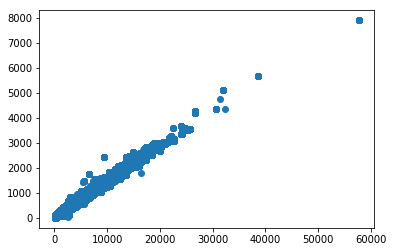

In [70]:
plt.scatter(x=df.descriptionCharacterLength, y=df.descriptionWordCount)

In [71]:
df[df.descriptionCharacterLength>39000].normTitle.value_counts()

warehouse worker    19
Name: normTitle, dtype: int64

In [72]:
df[df.descriptionCharacterLength>39000].country.value_counts()

US    19
Name: country, dtype: int64

The few mini-clusters that are pretty far away from the main cluster share a common trait: They are all warehouse worker jobs in the States. Job descriptions for warehouse workers in the U.S. seem to be longer than average job descriptions.

##### experienceRequired

In [73]:
print(len(df[df.experienceRequired.isnull()]), "missing values","(", 9370287*100 / len(df), "%)")

9370287 missing values ( 64.24149537554243 %)


In [74]:
print("minimum", df.experienceRequired.min(), "years", "maximum", df.experienceRequired.max(), "years")

minimum 0.0 years maximum 20.0 years


If two observations share the same companyId, jobId and country, the experienceRequired will be the same too

In [75]:
df.experienceRequired = df.groupby(['companyId','jobId','country']).experienceRequired.ffill()

In [76]:
df.experienceRequired = df.groupby(['companyId','jobId','country']).experienceRequired.bfill()

In [77]:
print("missing values reduced to", len(df[df.experienceRequired.isnull()]), "(", 
      len(df[df.experienceRequired.isnull()]) * 100 / len(df), "%)", "(filled", 9370287 - 9294997, "missing values)")

missing values reduced to 9294997 ( 63.72531671561188 %) (filled 75290 missing values)


We still have quite a few missing values for the experienceRequired column. But if we think about it, it is usually true that the higher the salary is, the more likely the experience required for that position is higher. Let's see if there is a correlation between those two variables

In [78]:
df[df.experienceRequired.notnull()].experienceRequired.corr(df.estimatedSalary)

0.39766239995753105

The non-null values of experiencedRequired and estimatedSalary have a correlation of 0.397 (almost 0.4) which is a pretty strong positive linear relationship. Let's use linear regression to impute the missing values for the experienceRequired column.

In [79]:
from sklearn import linear_model

In [80]:
lr = linear_model.LinearRegression()

In [81]:
lr.fit(df[df.experienceRequired.notnull()].estimatedSalary.reshape(-1,1),
       df[df.experienceRequired.notnull()].experienceRequired.reshape(-1,1))

C:\Users\josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
df_experienceRequired_notnull = df.copy()[df.copy().experienceRequired.notnull()]
df_experienceRequired_null = df.copy()[df.copy().experienceRequired.isnull()]

In [83]:
df_experienceRequired_null['experienceRequired'] = \
lr.predict(df[df.experienceRequired.isnull()].estimatedSalary.reshape(-1,1))

C:\Users\josh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [84]:
df2 = df_experienceRequired_notnull.append(df_experienceRequired_null)

In [85]:
df = df2

In [86]:
# No more missing values
len(df[df.experienceRequired.isnull()])

0

##### estimatedSalary

In [87]:
# No missing values
len(df[df.estimatedSalary.isnull()])

0

But if estimatedSalary is 0.0, it means the estimate is unavailable

In [88]:
print("The proportion percentage of 0.0 in estimateSalary column:", df.estimatedSalary.value_counts()[0] * 100/ len(df), "%")

The proportion percentage of 0.0 in estimateSalary column: 1.76821871057 %


##### salaryCurrency

In [89]:
# salaryCurrency: 12404394 missing values
len(df[df.salaryCurrency.isnull()])

12404394

Since we have the "country" column all filled in, we can use this column to fill in the missing values for the salaryCurrency column

In [90]:
# If salary currency info is missing, fill in with country data in that row
df.salaryCurrency = np.where(df.salaryCurrency.isnull(), df.country, df.salaryCurrency)

In [91]:
df.salaryCurrency = df.salaryCurrency.replace({'US':'USD','DE':'EUR','CA':'CAD'})

In [92]:
# No more missing values
df.salaryCurrency.isnull().sum()

0

###### jobLanguage

In [93]:
# No missing value
len(df[df.jobLanguage.isnull()])

0

In [94]:
df.jobLanguage.value_counts()

EN    12547718
DE     1853422
FR      184895
Name: jobLanguage, dtype: int64

##### supervisingJob / licenseRequiredJob / educationRequirements

In [95]:
print(len(df[df.supervisingJob.isnull()]), "missing values","(", len(df[df.supervisingJob.isnull()])*100 / len(df), "%)")

2039719 missing values ( 13.984053925552763 %)


In [97]:
print(len(df[df.licenseRequiredJob.isnull()]), "missing values","(", len(df[df.licenseRequiredJob.isnull()])*100 / len(df), "%)")

2039719 missing values ( 13.984053925552763 %)


In [98]:
print(len(df[df.educationRequirements.isnull()]), "missing values","(", 
      len(df[df.educationRequirements.isnull()])*100 / len(df), "%)")

2039719 missing values ( 13.984053925552763 %)


supervisingJob / licenseRequiredJob / educationRequirements all have the EXACTLY SAME number of missing values. Do those missing values for all three variables coincide in the same rows? Let's check if the non-null dataframes for the three variables are the same

In [104]:
# supervisingJob non-null = licenseRequiredJob non-null 
df[df.supervisingJob.isnull()].equals(df[df.licenseRequiredJob.isnull()])

True

In [105]:
# licenseRequiredJob non-null = educationRequirements non-null
df[df.licenseRequiredJob.isnull()].equals(df[df.educationRequirements.isnull()])

True

So all three variables are missing values in exactly the same locations

Two observations that share the same companId, jobId, country, descriptionWordCount, and estimatedSalary will have the same supervisingJob / licenseRequiredJob / educationRequirements. I will use this trait to fill in missing values.

In [108]:
df.supervisingJob = df.groupby(['companyId','jobId','country','descriptionWordCount','estimatedSalary']).supervisingJob.ffill()

In [109]:
df.supervisingJob = df.groupby(['companyId','jobId','country','descriptionWordCount', 'estimatedSalary']).supervisingJob.bfill()

In [111]:
print("missing values reduced to", len(df[df.supervisingJob.isnull()]), "(", 
      len(df[df.supervisingJob.isnull()]) * 100 / len(df), "%)", "(filled", 2039719 - 2039694, "missing values)")

missing values reduced to 2039694 ( 13.983882528733819 %) (filled 25 missing values)


In [113]:
df.licenseRequiredJob = df.groupby(['companyId','jobId','country','descriptionWordCount','estimatedSalary']).licenseRequiredJob.ffill()

In [114]:
df.licenseRequiredJob = df.groupby(['companyId','jobId','country','descriptionWordCount', 'estimatedSalary']).licenseRequiredJob.bfill()

In [116]:
print("missing values reduced to", len(df[df.licenseRequiredJob.isnull()]), "(", 
      len(df[df.licenseRequiredJob.isnull()]) * 100 / len(df), "%)", "(filled", 2039719 - 2039694, "missing values)")

missing values reduced to 2039694 ( 13.983882528733819 %) (filled 25 missing values)


In [117]:
df.educationRequirements =\
df.groupby(['companyId','jobId','country','descriptionWordCount','estimatedSalary']).educationRequirements.ffill()

In [118]:
df.educationRequirements =\
df.groupby(['companyId','jobId','country','descriptionWordCount', 'estimatedSalary']).educationRequirements.bfill()

In [119]:
print("missing values reduced to", len(df[df.educationRequirements.isnull()]), "(", 
      len(df[df.educationRequirements.isnull()]) * 100 / len(df), "%)", "(filled", 2039719 - 2039694, "missing values)")

missing values reduced to 2039694 ( 13.983882528733819 %) (filled 25 missing values)


In [122]:
df.supervisingJob.value_counts()

0.0    10578398
1.0     1967943
Name: supervisingJob, dtype: int64

In [120]:
df.licenseRequiredJob.value_counts()

0.0    8057974
1.0    4488367
Name: licenseRequiredJob, dtype: int64

In [121]:
df.educationRequirements.value_counts()

None                6389067
Higher Education    3282263
High School         2875011
Name: educationRequirements, dtype: int64

I will fill in the remaining missing values for supervisingJob and licenseRequiredJob columns as "2" and "UNKNOWN" for the educationRequirements column

In [123]:
df.supervisingJob = df.supervisingJob.fillna(2)
df.licenseRequiredJob = df.licenseRequiredJob.fillna(2)
df.educationRequirements = df.educationRequirements.fillna('UNKNOWN')

###### jobAgeDays/ clicks/ localClicks

In [124]:
# No missing values for all three variables
print(len(df[df.jobAgeDays.isnull()]), len(df[df.clicks.isnull()]), len(df[df.localClicks.isnull()]))

0 0 0


Checking for the last time if there is any missing value in the entire dataset

In [129]:
# No missing values in the entire dataset: verified!
df.isnull().any()

date                          False
companyId                     False
jobId                         False
country                       False
stateProvince                 False
city                          False
avgOverallRating              False
numReviews                    False
industry                      False
normTitle                     False
normTitleCategory             False
descriptionCharacterLength    False
descriptionWordCount          False
experienceRequired            False
estimatedSalary               False
salaryCurrency                False
jobLanguage                   False
supervisingJob                False
licenseRequiredJob            False
educationRequirements         False
jobAgeDays                    False
clicks                        False
localClicks                   False
dtype: bool

Checking any outliers in the numerical variables

In [130]:
df.describe()

,avgOverallRating,numReviews,descriptionCharacterLength,descriptionWordCount,experienceRequired,estimatedSalary,supervisingJob,licenseRequiredJob,jobAgeDays,clicks,localClicks
count,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07,1.458604e+07
mean,1.714418e+00,8.137872e+01,2.367596e+03,3.838393e+02,2.755687e+00,4.366853e+04,4.145973e-01,5.873944e-01,3.077662e+01,2.244453e+01,3.709751e+00
std,1.882961e+00,5.337754e+02,1.705653e+03,2.444619e+02,1.997754e+00,2.831784e+04,7.227614e-01,7.225233e-01,2.581497e+01,3.557438e+01,1.047951e+01
min,0.000000e+00,0.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.167000e+03,2.130000e+02,1.891619e+00,2.410000e+04,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,2.005000e+03,3.330000e+02,2.122904e+00,3.350000e+04,0.000000e+00,0.000000e+00,2.300000e+01,1.800000e+01,1.000000e+00
75%,3.700000e+00,6.000000e+01,3.149000e+03,4.970000e+02,3.000000e+00,5.560000e+04,1.000000e+00,1.000000e+00,4.800000e+01,2.500000e+01,3.000000e+00
max,5.000000e+00,1.056500e+04,5.777400e+04,7.908000e+03,2.000000e+01,2.489000e+05,2.000000e+00,2.000000e+00,1.010000e+02,1.719600e+04,2.156000e+03


Most of the numerical variables are within the range of (mean - std x 3 , mean + std x 3) except for descriptionCharacterLength / descriptionWordCount whose outliers I examined earlier above.

## Saving Cleaned Dataset to local directory for further analysis

In [131]:
df.to_csv('E:\josh_data_science\Vassar Datafest 2018\Dataset_and_FeatureDictionary\indeed_cleaned.csv')

https://www.slideshare.net/MineCetinkayaRundel/datafest-2018-presentation-by-team-baes-bayes?ref=https://www2.stat.duke.edu/datafest/df2018/

https://www2.stat.duke.edu/datafest/df2018/

https://medium.com/@mandygu/winning-best-insights-for-datafest-2018-uw-ad8a7ea228b8